In [1]:
import pandas as pd
#import gensim
import matplotlib.pyplot as plt
import numpy as np
import nltk 
from nltk.corpus import stopwords
from pprint import pprint
from time import time
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from sklearn.metrics import accuracy_score,confusion_matrix
from bs4 import BeautifulSoup
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report 

In [4]:
tags=['A','B','C','D','E','F','G','H']


data=pd.read_csv('Desktop/internship/ipc_file1.tsv',sep='\t')

print(data.head(10))

                                                text value
0  b'Shrub rose plant named \xe2\x80\x98Noa181110...     A
1  b'A new and distinct shrub rose cultivar, for ...     A
2  b'Latin name of the genus and species: Variety...     A
3  b'\n1. A new and distinct shrub rose plant nam...     A
4  b'Miniature rose plant named \xe2\x80\x98KORpo...     A
5  b'\xe2\x80\x98KORpot060\xe2\x80\x99 is a new a...     A
6  b"Latin name of genus and species: The Latin n...     A
7  b'\n1. A new and distinct variety of rose plan...     A
8  b'Grandiflora rose plant named \xe2\x80\x98WEK...     A
9  b'A new variety of Grandiflora rose suitable f...     A


b'Classification: The present invention relates to a new Variety denomination: The new plant has the varietal denomination \xe2\x80\x98WEKmeroro\xe2\x80\x99.This invention relates to a new and distinct variety of Grandiflora Rose. It has as its seed parent the variety known as \xe2\x80\x98WEKmeredoc\xe2\x80\x99 (not patented) and as its pollen parent the variety known as \xe2\x80\x98WEKgobnez\xe2\x80\x99 (U.S. Plant Pat. No. 20,936).Among the features which distinguish the new variety from other presently available and commercial rose cultivars known to the inventor are the following combinations of characteristics: its strong citrus-like with hints of spices fragrance, its elegant flowers of fuchsia pink striped with bright white coloration, its excellent color stability throughout the life of the flowers and its abundant blooms. The plant has an upright bushy growing habit, suitable for outdoor garden decoration.Asexual reproduction of the new variety by budding as performed in Kern 

29185843


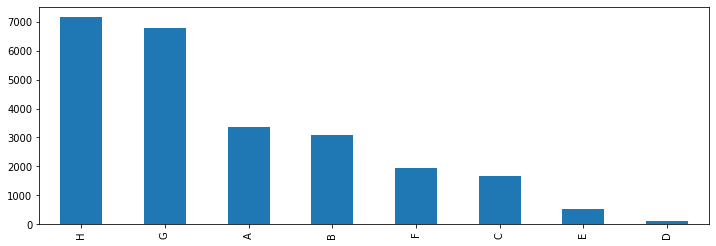

In [5]:
#to count no of words in dataset
def count_words():
    print(data['text'].apply(lambda x: len(x.split(' '))).sum())


def plot_graph():
    plt.figure(figsize=(12,4))
    data.value.value_counts().plot(kind='bar')

plot_graph()

def print_plot(index):
    d=data[data.index==index][['text','value']].values[0]
    if len(d)>0:
        print(d[0])
        print('value:',d[1])

print_plot(10)
        

#no of words before cleaning
count_words()    

In [6]:
#text cleaning
space=re.compile('[/(){}\[\]\|@,;]')
bad_symbol=re.compile('[^0-9a-zA-Z #+_]')
StopWords=set(stopwords.words('english'))    
#print(StopWords)       
#print(bad_symbol) 

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


def data_cleaner(dataset):
    dataset=BeautifulSoup(dataset,"lxml").text #HTML decoding
    dataset=dataset.lower()
    dataset=space.sub(' ',dataset)
    dataset=bad_symbol.sub('',dataset)
    dataset=' '.join(wordnet_lemmatizer.lemmatize(word) for word in dataset.split() if word not in StopWords)
    return dataset
    
data['text']=data['text'].apply(data_cleaner)

print_plot(10)

bclassification present invention relates new variety denomination new plant varietal denomination xe2x80x98wekmeroroxe2x80x99this invention relates new distinct variety grandiflora rose seed parent variety known xe2x80x98wekmeredocxe2x80x99 patented pollen parent variety known xe2x80x98wekgobnezxe2x80x99 u plant pat 20 936 among feature distinguish new variety presently available commercial rose cultivar known inventor following combination characteristic strong citruslike hint spice fragrance elegant flower fuchsia pink striped bright white coloration excellent color stability throughout life flower abundant bloom plant upright bushy growing habit suitable outdoor garden decorationasexual reproduction new variety budding performed kern county pomona calif show foregoing distinguishing characteristic come true form established transmitted succeeding asexual propagation xe2x80x98wekmeroroxe2x80x99 may asexually propagated cutting budding grafting budding grafting successfully occurred 

In [7]:
count_words()

#splitting data into training and validating dataset
x=data.text
y=data.value
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

17500336


In [8]:
#Naive-Bayes
#making a pipeline for converting dataset to a matrix of token counts
#then transform a count matrix to a normalized tfidf representation
#and the fitting that dataset 
processor=Pipeline([('vect',CountVectorizer()),
                ('tranform',TfidfTransformer()),
                ('multi',MultinomialNB())])
    

processor.fit(x_train,y_train)


y_predict=processor.predict(x_test) 

#print(y_predict)

print('accuracy %s' % accuracy_score(y_predict,y_test))
print(classification_report(y_test,y_predict,target_names=tags))
count_misclassified = (y_test != y_predict).sum()
count_classified=(y_test==y_predict).sum()
print("misclassified:",count_misclassified)
print("classified:",count_classified)


accuracy 0.5656057161416044
              precision    recall  f1-score   support

           A       0.83      0.41      0.54       840
           B       0.83      0.17      0.29       771
           C       0.89      0.14      0.25       436
           D       0.00      0.00      0.00        34
           E       0.00      0.00      0.00       134
           F       1.00      0.10      0.19       496
           G       0.57      0.82      0.68      1678
           H       0.50      0.86      0.63      1769

    accuracy                           0.57      6158
   macro avg       0.58      0.31      0.32      6158
weighted avg       0.66      0.57      0.51      6158

misclassified: 2675
classified: 3483


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
#Linear Support Vector Machine

from sklearn.linear_model import SGDClassifier

processor=Pipeline([('vect',CountVectorizer()),
                ('tranform',TfidfTransformer()),
                ('sgd',SGDClassifier(loss='hinge',
                penalty='l2',alpha=1e-3,random_state=42,max_iter=5,tol=None))])


processor.fit(x_train,y_train)
y_predict=processor.predict(x_test)

print('accuracy %s' % accuracy_score(y_predict,y_test))
print(classification_report(y_test,y_predict,target_names=tags))
count_misclassified = (y_test != y_predict).sum()
count_classified=(y_test==y_predict).sum()
print("misclassified:",count_misclassified)
print("classified:",count_classified)

accuracy 0.7099707697304319
              precision    recall  f1-score   support

           A       0.81      0.70      0.75       840
           B       0.79      0.49      0.61       771
           C       0.72      0.67      0.69       436
           D       0.93      0.41      0.57        34
           E       0.83      0.29      0.43       134
           F       0.70      0.72      0.71       496
           G       0.69      0.76      0.72      1678
           H       0.67      0.81      0.73      1769

    accuracy                           0.71      6158
   macro avg       0.77      0.61      0.65      6158
weighted avg       0.72      0.71      0.70      6158

misclassified: 1786
classified: 4372


In [10]:
#after changing loss to squared_hinge and max_iter=50 alpha=1e-5

processor=Pipeline([('vect',CountVectorizer()),
                ('tranform',TfidfTransformer()),
                ('sgd',SGDClassifier(loss='squared_hinge',
                penalty='l2',alpha=1e-5,random_state=42,max_iter=50,tol=None))])
    
    


processor.fit(x_train,y_train)
y_predict=processor.predict(x_test)

print('accuracy %s' % accuracy_score(y_predict,y_test))
print(classification_report(y_test,y_predict,target_names=tags))
count_misclassified = (y_test != y_predict).sum()
count_classified=(y_test==y_predict).sum()
print("misclassified:",count_misclassified)
print("classified:",count_classified)


accuracy 0.7190646313738227
              precision    recall  f1-score   support

           A       0.88      0.70      0.78       840
           B       0.84      0.65      0.73       771
           C       0.87      0.59      0.70       436
           D       0.03      0.85      0.06        34
           E       0.82      0.38      0.52       134
           F       0.89      0.71      0.79       496
           G       0.81      0.76      0.78      1678
           H       0.83      0.78      0.81      1769

    accuracy                           0.72      6158
   macro avg       0.75      0.68      0.65      6158
weighted avg       0.84      0.72      0.77      6158

misclassified: 1730
classified: 4428


In [11]:
#after changing loss to modified_huber and max_iter 80 ,shuffle=True

processor=Pipeline([('vect',CountVectorizer()),
                ('tranform',TfidfTransformer()),
                ('sgd',SGDClassifier(loss='modified_huber',
                penalty='l2',alpha=1e-5,random_state=42,max_iter=80,tol=None,shuffle=True))])
    
    


processor.fit(x_train,y_train)
y_predict=processor.predict(x_test)

print('accuracy %s' % accuracy_score(y_predict,y_test))
print(classification_report(y_test,y_predict,target_names=tags))
count_misclassified = (y_test != y_predict).sum()
count_classified=(y_test==y_predict).sum()
print("misclassified:",count_misclassified)
print("classified:",count_classified)


accuracy 0.8262422864566418
              precision    recall  f1-score   support

           A       0.85      0.81      0.83       840
           B       0.84      0.79      0.81       771
           C       0.86      0.80      0.83       436
           D       0.91      0.59      0.71        34
           E       0.82      0.72      0.77       134
           F       0.87      0.84      0.86       496
           G       0.79      0.84      0.81      1678
           H       0.82      0.85      0.84      1769

    accuracy                           0.83      6158
   macro avg       0.85      0.78      0.81      6158
weighted avg       0.83      0.83      0.83      6158

misclassified: 1070
classified: 5088


In [12]:
#using random searchCV

from sklearn.model_selection import RandomizedSearchCV


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(shuffle=True)),
])
    

parameters = {
    'clf__loss':('squared_hinge','hinge','modified_huber','log'),
    'clf__alpha': (0.0001,0.00001, 0.000001,0.0000001,0.00000001,0.000000001),
    'clf__penalty': ('l1','l2', 'elasticnet','none'),
    'clf__max_iter': (40,50,80,100,120),
}

rscv = RandomizedSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing random  search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
rscv.fit(x_train,y_train)
print("done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % rscv.best_score_)
print("Best parameters set:")
best_parameters = rscv.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name])) 

y_predict=rscv.predict(x_test)
print('accuracy %s' % accuracy_score(y_predict,y_test))
print(classification_report(y_test,y_predict,target_names=tags))
count_misclassified = (y_test != y_predict).sum()
count_classified=(y_test==y_predict).sum()
print("misclassified:",count_misclassified)
print("classified:",count_classified)

Performing random  search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09),
 'clf__loss': ('squared_hinge', 'hinge', 'modified_huber', 'log'),
 'clf__max_iter': (40, 50, 80, 100, 120),
 'clf__penalty': ('l1', 'l2', 'elasticnet', 'none')}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.4min finished


done in 401.587s

Best score: 0.758
Best parameters set:
	clf__alpha: 1e-09
	clf__loss: 'squared_hinge'
	clf__max_iter: 50
	clf__penalty: 'l2'


NameError: name 'grid' is not defined

In [13]:

y_predict=rscv.predict(x_test)
print('accuracy %s' % accuracy_score(y_predict,y_test))
print(classification_report(y_test,y_predict,target_names=tags))
count_misclassified = (y_test != y_predict).sum()
count_classified=(y_test==y_predict).sum()
print("misclassified:",count_misclassified)
print("classified:",count_classified)

accuracy 0.7957128937966872
              precision    recall  f1-score   support

           A       0.79      0.82      0.81       840
           B       0.80      0.75      0.78       771
           C       0.85      0.78      0.81       436
           D       0.31      0.79      0.45        34
           E       0.76      0.71      0.73       134
           F       0.83      0.81      0.82       496
           G       0.78      0.80      0.79      1678
           H       0.82      0.81      0.81      1769

    accuracy                           0.80      6158
   macro avg       0.74      0.78      0.75      6158
weighted avg       0.80      0.80      0.80      6158

misclassified: 1258
classified: 4900
